In [9]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("./data/relations.csv")
label = pd.read_csv("./data/characters.csv")
G_hp = nx.Graph()

In [11]:
for _, edge in data.iterrows():
    G_hp.add_edge(edge['source'], edge['target'])

for u, v in G_hp.edges():
    G_hp[u][v]["weight"] = G_hp.degree(u) + G_hp.degree(v)

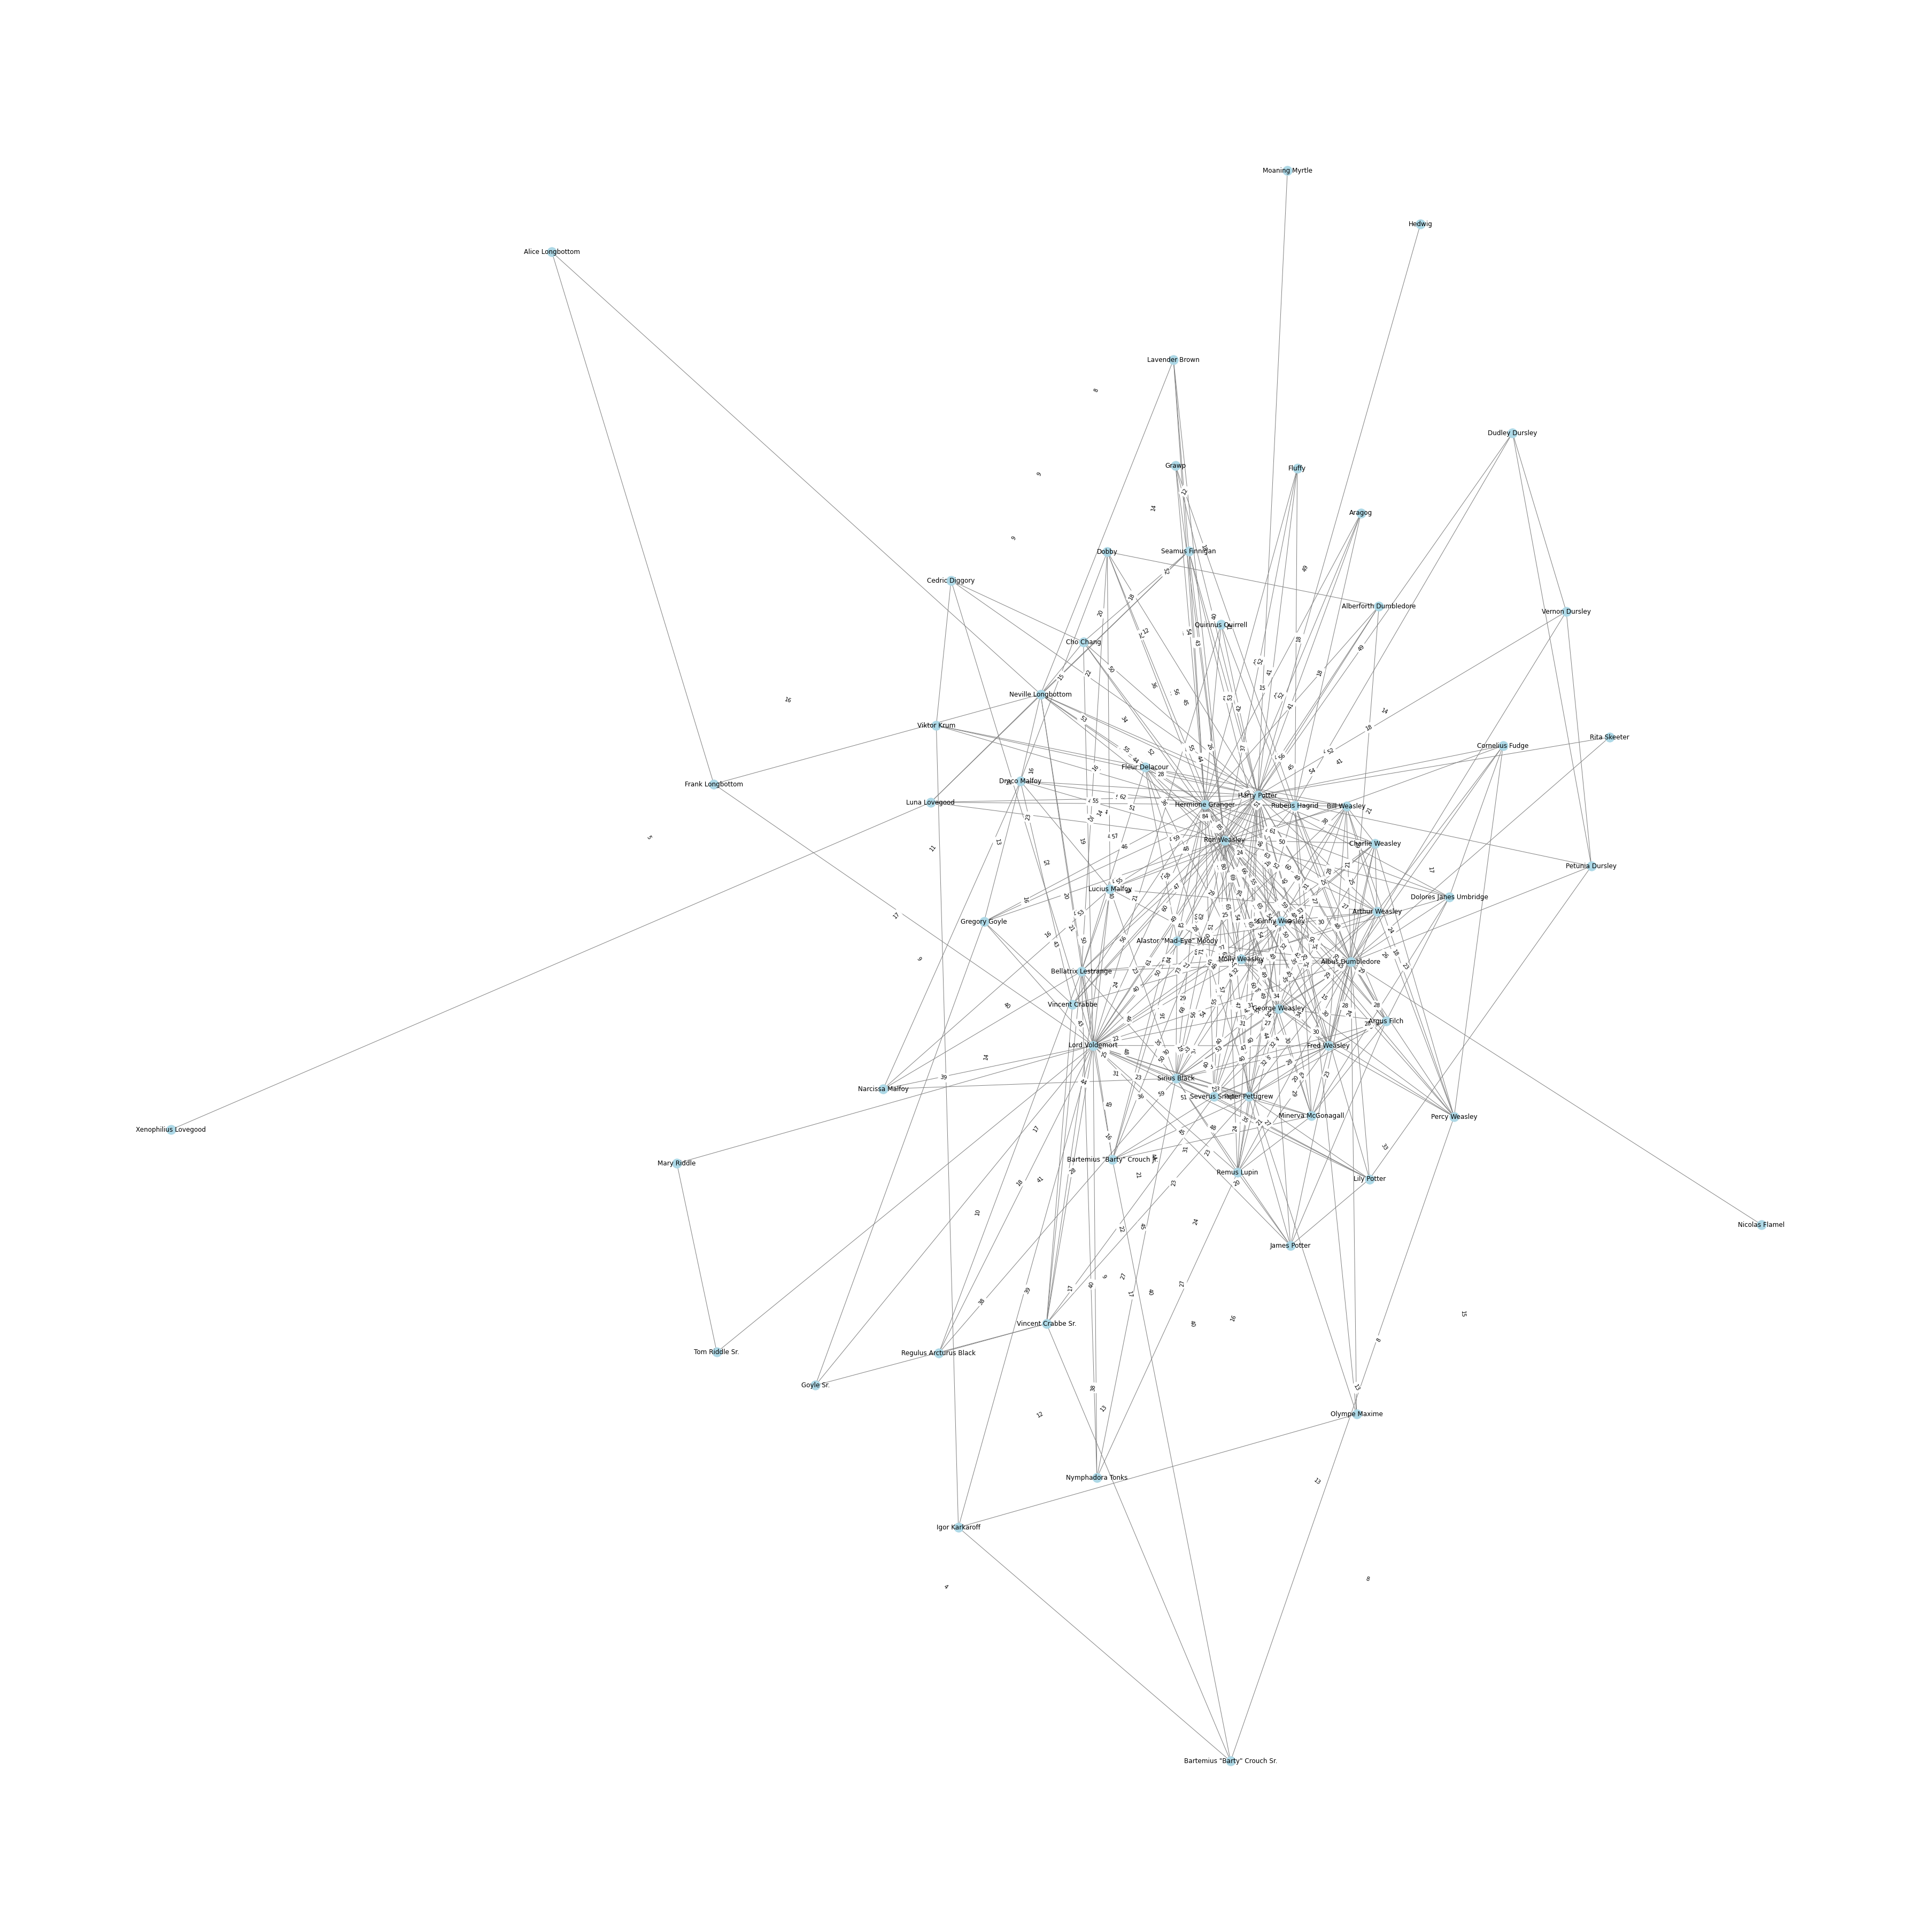

In [12]:
plt.figure(figsize=(50,50))

labels = {row["id"]: row["name"] for index, row in label.iterrows()}

nx.set_node_attributes(G_hp, labels, "name")

pos = nx.spring_layout(G_hp)  
node_labels = nx.get_node_attributes(G_hp, "name")
edge_labels = {(u, v): d["weight"] for u, v, d in G_hp.edges(data=True)}
nx.draw(G_hp, with_labels=True, labels=node_labels, node_color='lightblue', edge_color="gray")
nx.draw_networkx_edge_labels(G_hp, pos, edge_labels=edge_labels)
plt.show()


In [13]:
import community

partition = community.best_partition(G_hp)

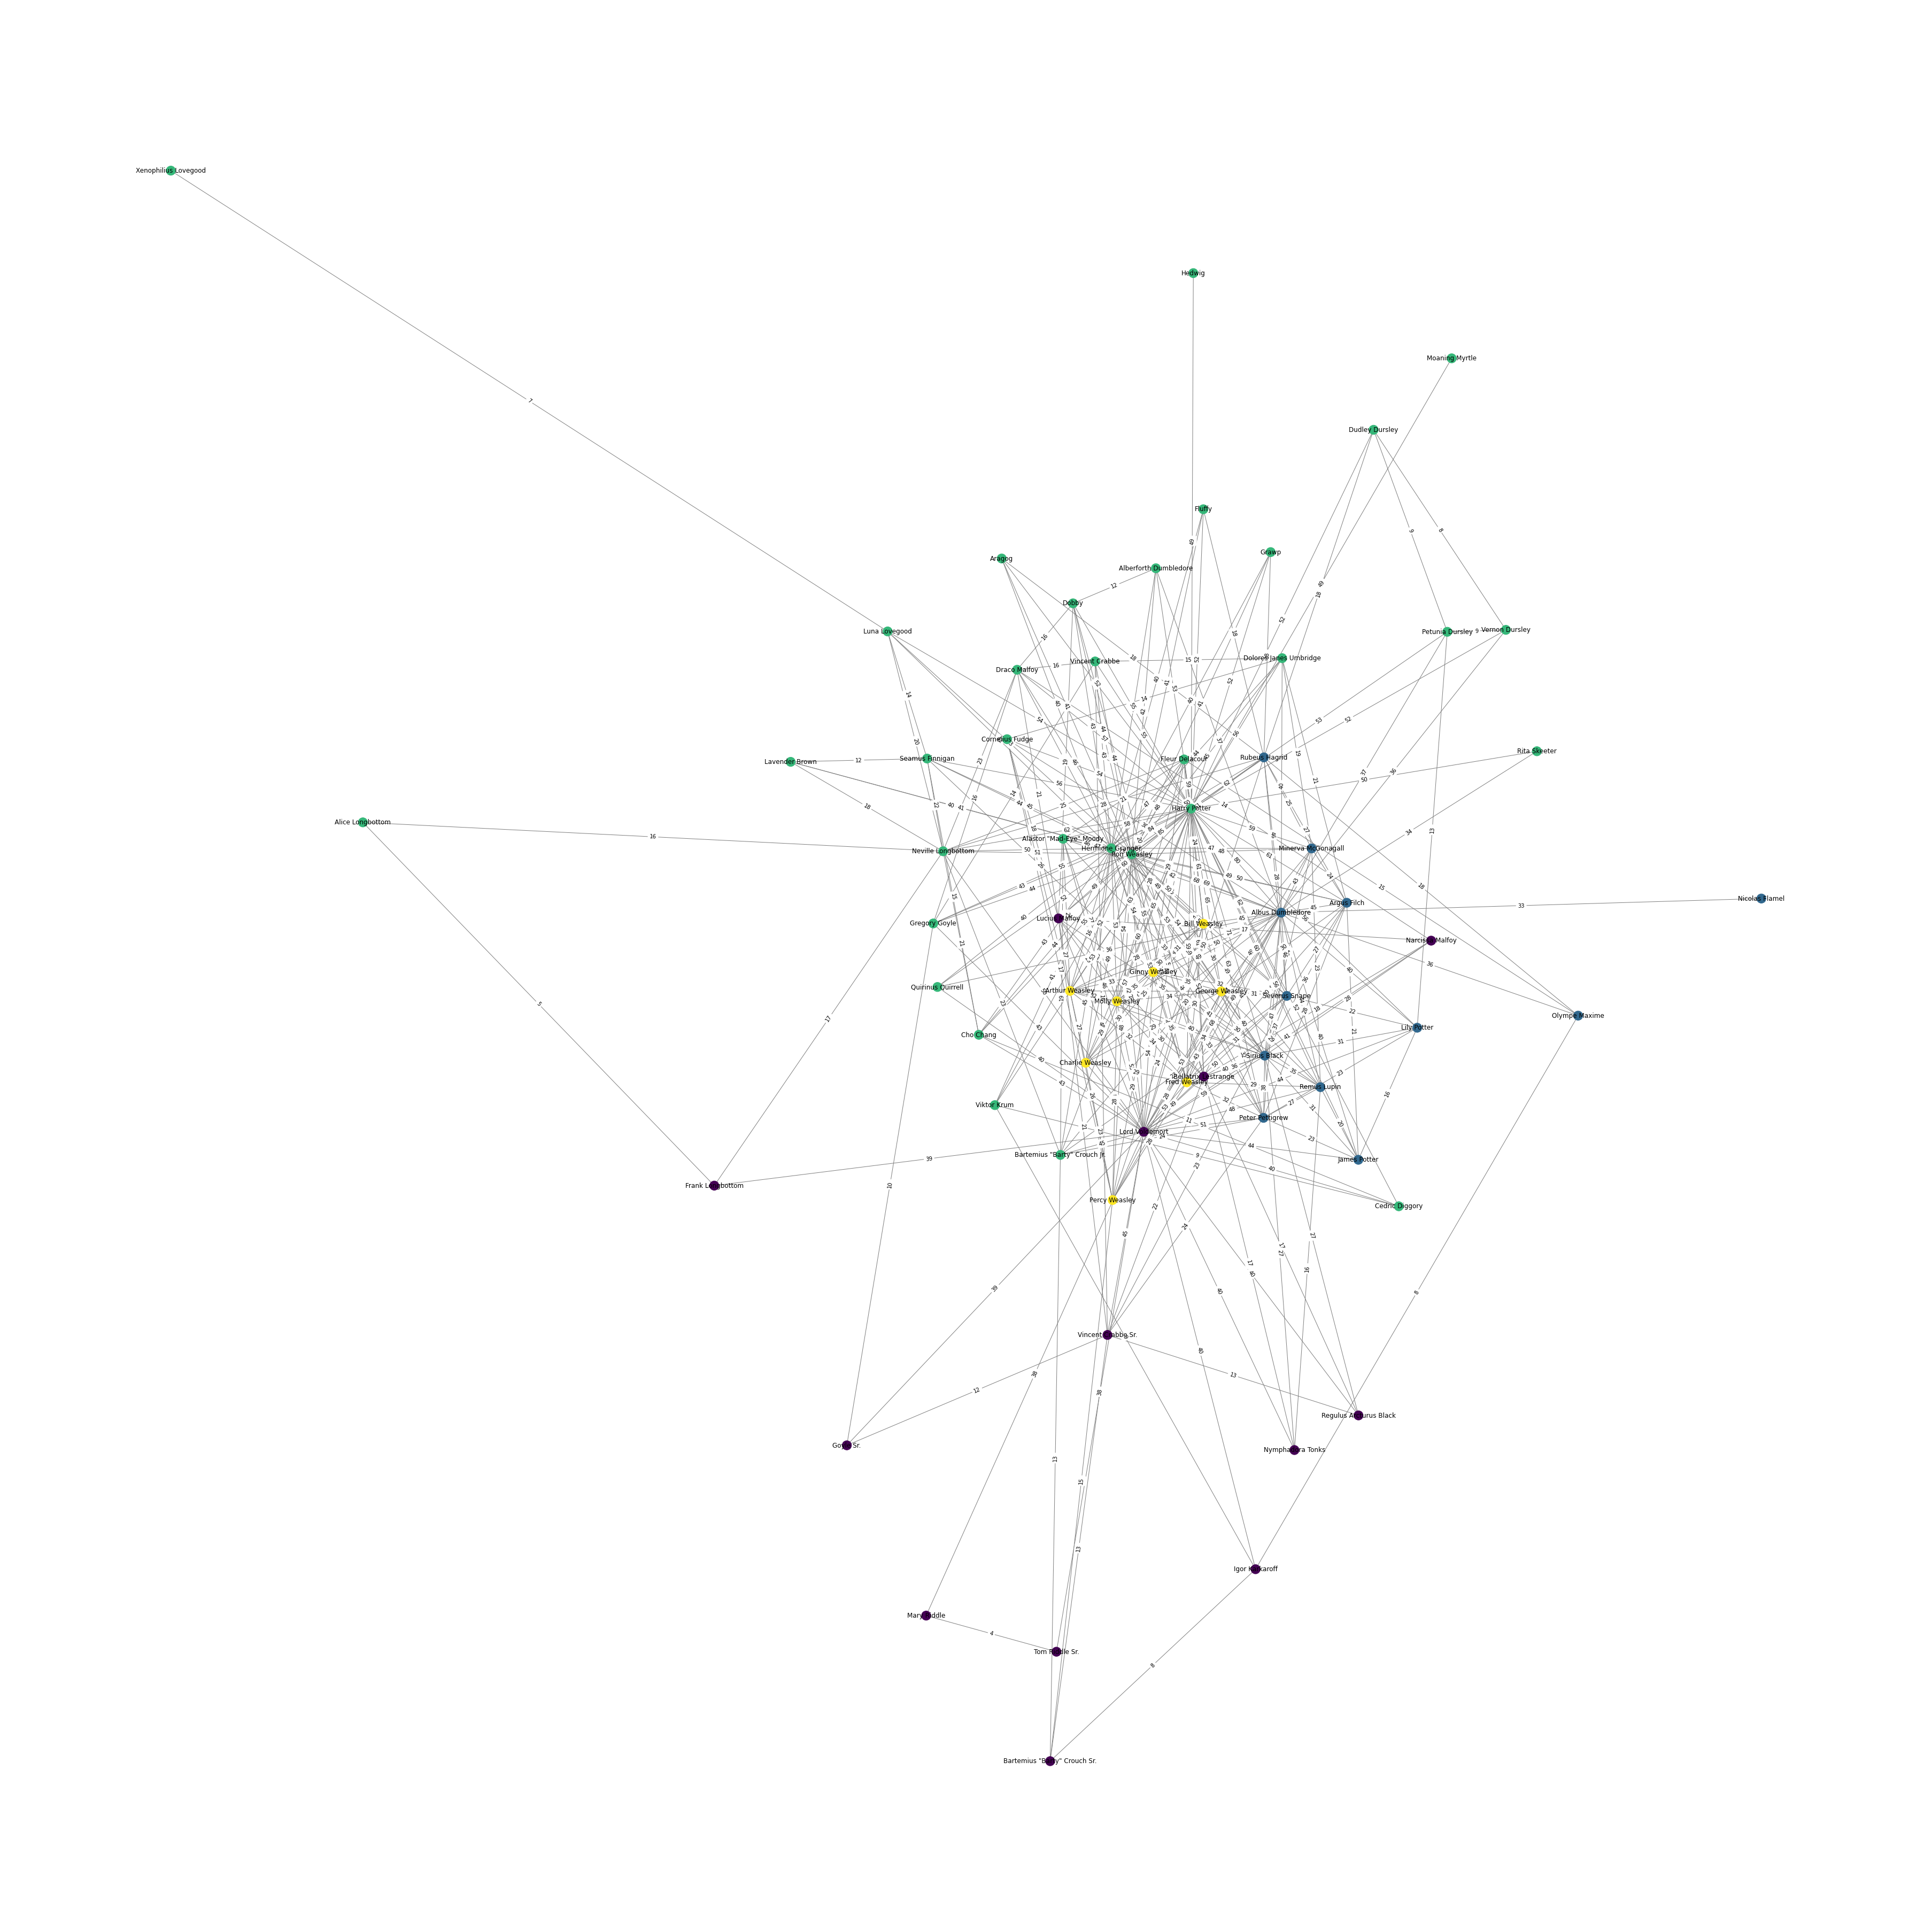

In [14]:
colors = [partition[node] for node in G_hp.nodes()]

plt.figure(figsize=(50,50))
pos = nx.spring_layout(G_hp)
nx.draw(G_hp, pos, node_color=colors, with_labels=True, labels=node_labels,edge_color="gray")
nx.draw_networkx_edge_labels(G_hp, pos, edge_labels=edge_labels)
plt.show()

In [15]:
modularity = community.modularity(partition, G_hp)
modularity

0.17592507759189946